# Exercise 5: Implicit Versus Explicit
## Part 1: Prepare Data
Import and prepare data and define the function for feature mapping

In [3]:
import pandas as pd

train_data = pd.read_csv('./../resources/datasets/microchips.csv', header=None, delimiter=',')
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X1 = X_train.iloc[:, 0].to_numpy()
X2 = X_train.iloc[:, 1].to_numpy()

def map_feature(self, X1, X2, D):
    """
    Map the features to a higher-dimensional space using polynomial features.
    Parameters:
    X1 (array-like): Feature 1.
    X2 (array-like): Feature 2.
    D (int): Degree of polynomial features.

    Returns:
    X_poly (array-like): Polynomial features.
    """
    one = np.ones([len(X1), 1])
    X_poly = np.c_[one, X1, X2]
    for i in range(2, D + 1):
        for j in range(0, i + 1):
            Xnew = X1 ** (i - j) * X2**j
            Xnew = Xnew.reshape(-1, 1)
            X_poly = np.append(X_poly, Xnew, 1)
    return X_poly

## Part 2: Train and Analyze

In [76]:
import time
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

degrees = [2, 4, 6, 8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31]
num_runs = 1000

linear_svm_times = []
poly_svm_times = []

# Calculate average times for linear SVM
for degree in degrees:
    total_time = 0
    for _ in range(num_runs):
        tic = time.time()
        
        X_mapped = map_feature(None, X1, X2, degree)
        classifier = svm.SVC(kernel='linear')
        classifier.fit(X_mapped, y_train)
        
        toc = time.time()
        total_time += (toc - tic) * 1000  # Convert to milliseconds
    
    average_time = total_time / num_runs
    linear_svm_times.append(round(average_time, 2))

# Calculate average times for polynomial SVM
for degree in degrees:
    total_time = 0
    for _ in range(num_runs):
        tic = time.time()
        
        classifier = svm.SVC(kernel='poly', degree=degree)
        classifier.fit(X_train, y_train)
        
        toc = time.time()
        total_time += (toc - tic) * 1000  # Convert to milliseconds
    
    average_time = total_time / num_runs
    poly_svm_times.append(round(average_time, 2))

    Degree  Linear SVM Time (ms)  Polynomial SVM Time (ms)
0        2                  0.39                      0.45
1        4                  0.37                      0.47
2        6                  0.52                      0.49
3        8                  0.60                      0.51
4       10                  0.72                      0.55
5       12                  0.97                      0.67
6       15                  1.34                      3.86
7       17                  1.80                      5.41
8       19                  2.31                     21.97
9       21                  2.74                     39.69
10      23                  3.37                    183.34
11      25                  4.14                     13.72
12      27                  4.97                     13.03
13      29                  5.80                    306.05
14      31                  6.90                    154.02


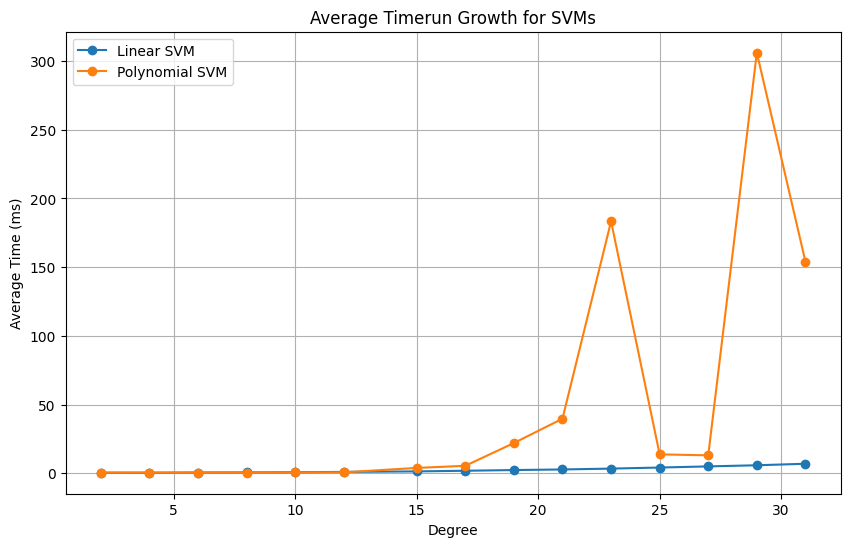

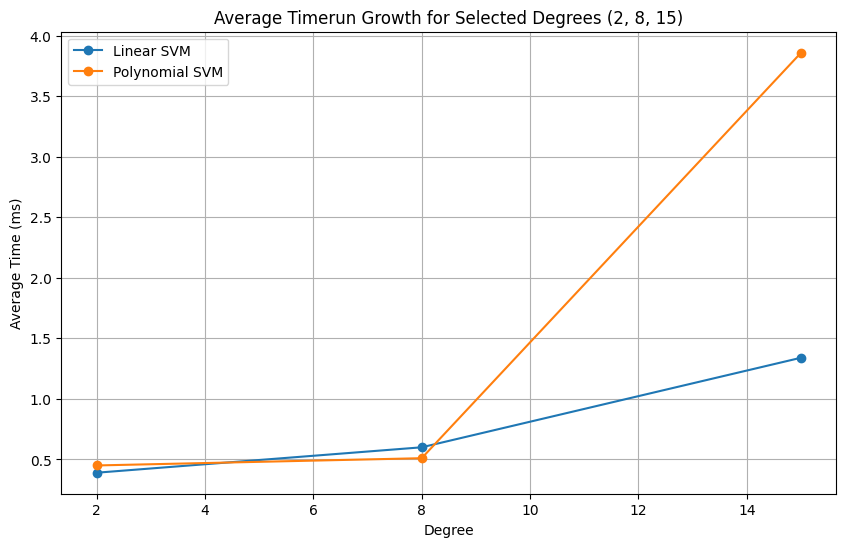

In [77]:
# Create a DataFrame to display the results as a table
results_df = pd.DataFrame({
    'Degree': degrees,
    'Linear SVM Time (ms)': linear_svm_times,
    'Polynomial SVM Time (ms)': poly_svm_times
})

print(results_df)

# Plot the average timerun growth for both SVMs
plt.figure(figsize=(10, 6))
plt.plot(degrees, linear_svm_times, label='Linear SVM', marker='o')
plt.plot(degrees, poly_svm_times, label='Polynomial SVM', marker='o')
plt.xlabel('Degree')
plt.ylabel('Average Time (ms)')
plt.title('Average Timerun Growth for SVMs')
plt.legend()
plt.grid(True)
plt.show()

# Plot results for degrees 2, 8, and 15 separately
selected_degrees = [2, 8, 15]
selected_linear_times = [linear_svm_times[degrees.index(d)] for d in selected_degrees]
selected_poly_times = [poly_svm_times[degrees.index(d)] for d in selected_degrees]

plt.figure(figsize=(10, 6))
plt.plot(selected_degrees, selected_linear_times, label='Linear SVM', marker='o')
plt.plot(selected_degrees, selected_poly_times, label='Polynomial SVM', marker='o')
plt.xlabel('Degree')
plt.ylabel('Average Time (ms)')
plt.title('Average Timerun Growth for Selected Degrees (2, 8, 15)')
plt.legend()
plt.grid(True)
plt.show()

## Discussion
Explicit mapping with the linear kernel showed steady and predictable growth in training time. In contrast, the polynomial kernel with implicit mapping exhibited significant fluctuations in training time for higher degrees, likely caused by numerical instability. These results highlight the computational efficiency and stability of explicit mapping for lower-degree polynomials, while implicit mapping with the polynomial kernel is better suited for moderate degrees but becomes unreliable and costly at higher ones.